# Numpy Basics:  Arrays and Vectorized Computation

In [1]:
import numpy as np

In [2]:
# test perfomance difference (Numpy array vs Python list)
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 19.4 ms, sys: 14.3 ms, total: 33.7 ms
Wall time: 33.2 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 1.52 s, sys: 148 ms, total: 1.67 s
Wall time: 1.67 s


## 4.1 The Numpy ndarray: A M-dim Array Object

In [5]:
data = np.random.randn(2, 3)
data

array([[ 1.24602048, -0.4947026 , -1.25294834],
       [ 1.83599757,  0.16576571,  2.23830607]])

In [6]:
data * 10  # all elements have been multiplied by 10

array([[ 12.46020483,  -4.94702603, -12.52948335],
       [ 18.35997566,   1.65765709,  22.3830607 ]])

In [7]:
data + data  # corresponding values in each "cell" in array have been added

array([[ 2.49204097, -0.98940521, -2.50589667],
       [ 3.67199513,  0.33153142,  4.47661214]])

In [8]:
# shape indicating each dim of array given as tuple
data.shape

(2, 3)

In [10]:
# data type 
data.dtype

dtype('float64')

#### Creating ndarrays

In [12]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [13]:
# works for nested arrays too
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [15]:
arr2.shape

(2, 4)

In [16]:
# unless specified numpy arrays tries to infer a good data type
arr2.dtype

dtype('int64')

In [17]:
arr1.dtype

dtype('float64')

In [18]:
# other numpy array creation methods
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
np.empty((2, 3, 2))  # returns garbage values (values in random memory)

array([[[ -1.72723371e-077,   2.68678572e+154],
        [  2.23227896e-314,   2.23227830e-314],
        [  2.23227786e-314,   2.23227836e-314]],

       [[  9.88131292e-324,   0.00000000e+000],
        [  2.14911590e-314,   1.90979621e-310],
        [ -1.72723371e-077,   8.38737519e-309]]])

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### Data types for ndarrays
dtype is special objext containing info about the ndarray needs to interpret a chunk of memory as a particular type of data

In [22]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [23]:
arr1.dtype

dtype('float64')

In [24]:
arr2.dtype

dtype('int32')

In [25]:
# convert or cast an array from one dtype to another using astype method
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [26]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [27]:
# going from float to int would truncate the decimal part

In [28]:
# convert strings representing number to a numeric form
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [29]:
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

#### Arithmetic with Numpy Arrays
Arrays are importnatn because they enable you to express batch operations on data without writing any for loops.

In [33]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [34]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [35]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [36]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [37]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [38]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [39]:
arr2 > arr1

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

Operations between differently sized arrays is called _broadcasting_ and is discussed in detail in Appendix A.

### Basic Indexing and Slicing

In [53]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
arr[5]

5

In [55]:
arr[5:8]

array([5, 6, 7])

In [56]:
arr[5:8] = 12  # value 12 is broadcasted to the entire section
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important first distiction from Python's list is that array sclices are _views_ on the original array. This means that the dat ais not copied, and any modiification to the view will be reflected in the source array.

In [57]:
# E.g.
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [58]:
arr_slice[1] = 12345
arr  # the second 12 is now 12345

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [59]:
# "bare" slice [:] will assign to all values in an array
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [60]:
# if you want to copy a slice of an ndarray instead of a view, you will
# need to be explicity
arr_slice = np.copy(arr[5:8])
arr_slice

array([64, 64, 64])

In [61]:
arr_slice[1] = 2
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [123]:
# in higher dim arrays there are more options. In 2-d arrays the
# elements at each index are no longer scalars but 1-d arrays
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9]])
arr2d[2]

array([7, 8, 9])

In [64]:
# individual elements be accessed in two ways
arr2d[0][2]

3

In [66]:
arr2d[0, 2]

3

In [83]:
# higher dim return object with lower dim
arr3d = np.array([[[1, 2, 3,], [4, 5, 6]],[[7, 8, 9], [10, 11, 12]]])
arr3d  # 2 x 2 x 3 array

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [84]:
arr3d[0]  # returns a 2 x 3 array

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
# both scalar values and arrays can be assigned to arr3d[0]
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [86]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [87]:
# gives all the values whose indices start with (1, 0)
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices
ndarrays can be sliced with the familar syntax

In [90]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [91]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [122]:
arr2d

array([[0, 0, 0],
       [0, 0, 0],
       [7, 8, 9]])

In [93]:
arr2d[:2]  # this reads as "select the first two rows of arr2d

array([[1, 2, 3],
       [4, 5, 6]])

In [94]:
# passing multuple slices just like passing multiple indexes
arr2d[:2, 1:]
# reads as "select first two rows and select last two columns

array([[2, 3],
       [5, 6]])

In [99]:
# select the second row but only the first two columns
arr2d[1, :2]

array([4, 5])

In [110]:
# select the 3rd column but only the first two rows
arr2d[:2, 2]

array([3, 6])

In [117]:
# note that a colon by itself means to take the entire axis
arr2d[:, :1]  # take all rows and select first row

array([[1],
       [4],
       [7]])

In [124]:
arr2d[:2, 1:] = 0 # assign zero to first two rows but only last two columns
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [145]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [146]:
data

array([[ 0.3755895 , -0.10151271,  0.65584734, -0.65594165],
       [-0.01620959, -1.27503709, -0.17798359,  0.92751057],
       [ 1.53770524, -0.2547449 ,  0.07390061,  0.05155694],
       [-0.3369778 ,  0.76383274, -0.23246721, -0.13492179],
       [-0.86124084, -2.47885249, -1.01480785, -1.05147665],
       [ 1.24802174, -1.11178119, -0.29693142,  1.02147851],
       [-0.89867918, -0.90602723,  0.37519304, -0.39116741]])

suppose each name corresponds to a row in the data array and we want to select all the rows with corresponding name "Bob". Comparisons (such as ==) withe arrays are also vectorized. So we get a boolean array

In [147]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [148]:
# boolean array can be passed when indexing the array
data[names == 'Bob']  # values are passed along each row so only rows 0 and 3 remain

array([[ 0.3755895 , -0.10151271,  0.65584734, -0.65594165],
       [-0.3369778 ,  0.76383274, -0.23246721, -0.13492179]])

In [149]:
# e.g. selects row where names == "Bobs" and index the columns too
data[names == "Bob", 2:] 

array([[ 0.65584734, -0.65594165],
       [-0.23246721, -0.13492179]])

In [150]:
data[names == "Bob", 3]  # returns rows where Bob is true and column 2

array([-0.65594165, -0.13492179])

In [153]:
# negating using != or ~
names != "Bob"

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [154]:
data[~(names == "Bob")]

array([[-0.01620959, -1.27503709, -0.17798359,  0.92751057],
       [ 1.53770524, -0.2547449 ,  0.07390061,  0.05155694],
       [-0.86124084, -2.47885249, -1.01480785, -1.05147665],
       [ 1.24802174, -1.11178119, -0.29693142,  1.02147851],
       [-0.89867918, -0.90602723,  0.37519304, -0.39116741]])

In [155]:
# ~ operator useful when inverting a general condition
cond = (names == "Bob")

In [158]:
data[~cond]

array([[-0.01620959, -1.27503709, -0.17798359,  0.92751057],
       [ 1.53770524, -0.2547449 ,  0.07390061,  0.05155694],
       [-0.86124084, -2.47885249, -1.01480785, -1.05147665],
       [ 1.24802174, -1.11178119, -0.29693142,  1.02147851],
       [-0.89867918, -0.90602723,  0.37519304, -0.39116741]])

In [161]:
# using multiple boolean condions like & (and) and | (or)
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [162]:
data[mask]

array([[ 0.3755895 , -0.10151271,  0.65584734, -0.65594165],
       [ 1.53770524, -0.2547449 ,  0.07390061,  0.05155694],
       [-0.3369778 ,  0.76383274, -0.23246721, -0.13492179],
       [-0.86124084, -2.47885249, -1.01480785, -1.05147665]])

In [163]:
# IMPORTANT
# Selecting data from array by boolean indexing always creates a copy of the data
# even if the returned array is unchanged

In [165]:
data[data < 0] = 0
# return boolean array from condition and pass it to data to 0 all negative values
data

array([[ 0.3755895 ,  0.        ,  0.65584734,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.92751057],
       [ 1.53770524,  0.        ,  0.07390061,  0.05155694],
       [ 0.        ,  0.76383274,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.24802174,  0.        ,  0.        ,  1.02147851],
       [ 0.        ,  0.        ,  0.37519304,  0.        ]])

In [167]:
data[names != "Joe"] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.        ,  0.        ,  0.92751057],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.24802174,  0.        ,  0.        ,  1.02147851],
       [ 0.        ,  0.        ,  0.37519304,  0.        ]])

### Fancy Indexing
Numpy term used to describe indexing using interger arrays

In [169]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [170]:
# to select a subject of rows in a particular order pass a list or array
# specifying the order
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [173]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [174]:
# passing multiple arrays selects a 1d array of elements correspondig to each tuple of indices
arr = np.arange(32).reshape(8, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [175]:
# returns element of "coordinate" represented by tuple pair
# e.g. (1, 0) = 4   (5, 3) = 23
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [176]:
# select rows of arr in order of list
# select all rows and order row elements by index in list
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [177]:
# remember fancy indexing, unlike slicing, always copies the data
# into a new array

### Transposing Arrays and Swapping Axes
Transposing is a special form of reshaping that returns the view (to the user) of the data without copying anything.

In [179]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [180]:
arr.T  # special attribute T (transpose method)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [181]:
arr = np.random.randn(6, 3)
arr

array([[-0.58145211,  0.36615752,  1.10339243],
       [-1.61273233, -0.49295482,  0.28711601],
       [-1.73335065,  0.46027096,  0.11676701],
       [-0.75000335, -0.25325909, -0.77157292],
       [ 0.06167027,  1.85290845,  0.65440481],
       [-0.91466766,  1.25266855, -1.4253801 ]])

In [182]:
np.dot(arr.T, arr)

array([[ 7.34642178, -1.05727074,  0.61577937],
       [-1.05727074,  5.65551355, -0.0613441 ],
       [ 0.61577937, -0.0613441 ,  4.36882385]])

In [183]:
# for higher dim arrays, tranpose will accept a tuple of axis numbers
# to permute the axes (for extra mind bending)...great

In [184]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [190]:
arr.transpose((1, 0, 2))  # *robot voice* (0_o) does not compute

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [191]:
# swaping axes to rearrange the data
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [192]:
arr.swapaxes(1, 2)  # returns a view on the data without making a copy

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal Functions: Fast Element-Wise Array Functions
A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them a fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [194]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [195]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [196]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [198]:
# binary ufuncs
x = np.random.randn(8)
y = np.random.randn(8)

In [199]:
np.maximum(x, y)

array([ 0.18013917, -0.7854993 ,  2.30299999,  0.18725378, -0.37837192,
        0.89585486,  1.30627528,  1.49254497])

In [200]:
# ufuncs can return multiple arrays too
arr = np.random.randn(7) * 5
arr

array([-3.2788233 ,  5.50409265, -5.27921421, -0.95957767,  4.73941181,
        2.93437825,  5.49904251])

In [203]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.2788233 ,  0.50409265, -0.27921421, -0.95957767,  0.73941181,
        0.93437825,  0.49904251])

In [204]:
whole_part

array([-3.,  5., -5., -0.,  4.,  2.,  5.])

In [205]:
# ufuncs accept an optional out arguments that allowd them to operate in-
# place on arrays
arr

array([-3.2788233 ,  5.50409265, -5.27921421, -0.95957767,  4.73941181,
        2.93437825,  5.49904251])

In [206]:
np.sqrt(arr)

/Users/aaron/.pyenv/versions/3.5.4/envs/env3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([        nan,  2.34608027,         nan,         nan,  2.17701902,
        1.7130027 ,  2.34500373])

In [207]:
np.sqrt(arr, arr)

/Users/aaron/.pyenv/versions/3.5.4/envs/env3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([        nan,  2.34608027,         nan,         nan,  2.17701902,
        1.7130027 ,  2.34500373])

## 4.3 Array-Oriented Programming with Arrays
Vectorization is the practice of replacing explicit loops with array expressions.

In [211]:
points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
# np.meshgrid takes two 1d arrays and produces two 2d matrices corresponding
# to all pairs of (x, y) in the two arrays

In [212]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [215]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [225]:
import matplotlib.pyplot as plt

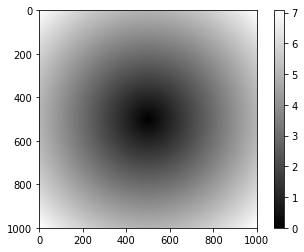

In [291]:
#plt.title("Image plot of $\sqrt{x^2 ^y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.show()

### Expressing Conditional Logic as Array Operations
The numpy.where function is a vectorized version of the ternary expression:  x if condition else y

In [240]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [241]:
# suppose we want to take a value from xarr whenever the corresponding
# value in cond is True, otherwise take yarr value

In [244]:
# list version
%timeit result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result
# slow for large arrays and not multidimensional

3.03 µs ± 65.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [245]:
# numpy version
%timeit result = np.where(cond, xarr, yarr)
result

1.05 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


array([ 1.1,  2.2,  1.3,  1.4,  2.5])

Second and third arguments of np.where don't need to be arrays; one or both can be scalars. Used typically in data analysis to produce a new array of values based on another array.
   * E.g. Suppose a matrix of randomly generated data and you want to replace all positive values with 2 and all negative values with -2

In [247]:
arr = np.random.randn(4, 4)
arr

array([[-0.19275886, -1.74352108,  0.57995144, -0.48655494],
       [-0.55910602,  1.01861519, -0.42771569,  1.14293808],
       [-0.70982817, -1.08016871, -1.46497596,  0.57739499],
       [ 2.16161705, -0.135788  , -1.69545609,  0.17377588]])

In [248]:
arr > 0

array([[False, False,  True, False],
       [False,  True, False,  True],
       [False, False, False,  True],
       [ True, False, False,  True]], dtype=bool)

In [249]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2],
       [-2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2, -2, -2,  2]])

In [251]:
# combining scalars and arrays
np.where(arr > 0 , 2, arr)  # set only positive values to 2

array([[-0.19275886, -1.74352108,  2.        , -0.48655494],
       [-0.55910602,  2.        , -0.42771569,  2.        ],
       [-0.70982817, -1.08016871, -1.46497596,  2.        ],
       [ 2.        , -0.135788  , -1.69545609,  2.        ]])

### Mathematical and Statistical Methods
A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of th array class. Aggregations (often called _reductions_) like sum, mean, and std can be called using a top-level numphy function or the array instance method.

In [252]:
arr = np.random.randn(5, 4)
arr

array([[ 0.08813593, -1.3396683 , -1.1194666 ,  0.5636469 ],
       [ 0.81916017, -0.6537906 ,  1.76429859,  1.11112354],
       [-0.48153669, -0.11843807,  0.51789174,  0.4728145 ],
       [-0.49594608, -0.00413462,  1.46417814, -0.865726  ],
       [ 2.05146481, -1.47125432, -0.19882357,  0.47895425]])

In [253]:
arr.mean()

0.12914418625612456

In [254]:
np.mean(arr)

0.12914418625612456

In [255]:
arr.sum()

2.5828837251224912

In [256]:
# functions like mean and sum take an optional axis argument that computes
# the statistic over the given axis
arr.mean(axis=1)

array([-0.45183802,  0.76019793,  0.09768287,  0.02459286,  0.21508529])

In [257]:
arr.sum(axis=0)

array([ 1.98127814, -3.58728592,  2.4280783 ,  1.7608132 ])

In [260]:
# other methods like cumsum and cumprod do not aggregate
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [261]:
# in multdim arrays, accumulation fumctions like cumsum return an array of the same size
# but with the partial aggregates computed along the indicated axis
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [262]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [263]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for Boolean Arrays
Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a boolean array.

In [264]:
arr = np.random.randn(100)
(arr > 0).sum()  # number of positive values

54

In [270]:
# Any and All are useful methods especially for boolean arrays
bools = np.array([False, False, True, False])
bools.any()  # any tests whethere one or more values in an array is True

True

In [273]:
# all checks if every value is True
bools.all()

False

In [274]:
# any and all also work with non-boolean arrays, where non-zero elemts evaluate to zero

### Sorting in Numpy

In [275]:
arr = np.random.randn(6)
arr

array([-0.89516986,  1.78249204, -1.79788436, -0.02977839, -1.03754786,
       -1.41393802])

In [276]:
arr.sort()
arr

array([-1.79788436, -1.41393802, -1.03754786, -0.89516986, -0.02977839,
        1.78249204])

In [283]:
# sort along an axis
arr = np.random.randn(5 ,3)
arr

array([[ 0.29553755, -1.33121237,  0.78437527],
       [-1.04230486,  0.1293605 ,  1.34885891],
       [ 0.65114872,  0.42623706, -1.75464121],
       [ 0.49372544,  0.71503896,  0.42508581],
       [-1.03216793, -1.03325834,  0.46454862]])

In [285]:
arr.sort(axis=1)
arr

array([[-1.33121237,  0.29553755,  0.78437527],
       [-1.04230486,  0.1293605 ,  1.34885891],
       [-1.75464121,  0.42623706,  0.65114872],
       [ 0.42508581,  0.49372544,  0.71503896],
       [-1.03325834, -1.03216793,  0.46454862]])

In [287]:
# np.sort returns a sorted copy of an array instead of modifiying the array in place

A quick and dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank (# of lin. indep rows)

In [288]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]  # 5% quantile (percentile)

-1.6431263198516171

### Unique and Other Set Logic
For 1d arrays

In [293]:
# np.unique returns the sorted unique values in an array
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [294]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [295]:
# tests if values of one array are contained in another
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## 4.4 File Input and Output with Arrays

In [296]:
# save and load are the two workhorse functions for efficiently saving and
# loading array data on disk.
arr = np.arange(10)
np.save("some_array", arr)  # if the file path does not end in .npy it will be appended

In [297]:
np.load("some_array.npy")  # load data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [298]:
# can save multiple arrays in an uncompressed archive using np.savez
# and passing the arrys a keywords arguments
np.savez('array_archive.npz', a=arr, b=arr)

In [299]:
# loading an .npz file, you get a dict-like object that loads the individual arrays lazily
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [300]:
# if data compresses well use np.savez_compressed
np.savez_compressed('array_archive.npz', a=arr, b=arr)

## 4.5 Linear Algebra

In [301]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [302]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [303]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [304]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [305]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [306]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [307]:
# @ (as of python 3.5) also works as an infix operator that performs multiplication
x @ np.ones(3)

array([  6.,  15.])

numpy.linalg has a standard set of matrix dexompositions and thins like inverse and determinant

In [308]:
from numpy.linalg import inv, qr

In [312]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 1.76737495,  3.71386416, -3.14528651, -2.37211532, -2.36855465],
       [ 3.71386416,  8.62911158, -6.74470665, -5.57174002, -5.75511939],
       [-3.14528651, -6.74470665,  6.01552581,  4.2220003 ,  4.07895854],
       [-2.37211532, -5.57174002,  4.2220003 ,  3.72998946,  3.85805468],
       [-2.36855465, -5.75511939,  4.07895854,  3.85805468,  4.65763706]])

In [313]:
mat.dot(inv(mat))

array([[  1.00000000e+00,  -6.71118637e-16,  -2.00750503e-15,
          2.74876287e-15,   3.33066907e-15],
       [  1.30417500e-15,   1.00000000e+00,   5.87502707e-15,
          6.23271401e-15,   8.88178420e-16],
       [ -5.41748227e-16,   2.95251438e-15,   1.00000000e+00,
         -2.32593238e-16,  -1.77635684e-15],
       [  3.26957947e-15,  -4.89972333e-15,  -3.01904990e-15,
          1.00000000e+00,  -9.76996262e-15],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]])

In [315]:
q, r = qr(mat)
r

array([[-12.43325841,  -1.31262859,  -5.38233003,  -3.22508573,
         -0.56604981],
       [  0.        , -10.15410235,  -3.33128283, -11.02860281,
         -0.51727272],
       [  0.        ,   0.        ,  -1.59684138,   4.18139146,  -2.1260259 ],
       [  0.        ,   0.        ,   0.        ,  -1.45639964,
          1.38224366],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.10428695]])

## 4.6 Pseudorandom Number Generation
The numpy.random module supplements the built-in Python _random_ with functions for generating whole arrays of sample values from many kinds of probability distributions

In [316]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.20483813,  0.38089699, -0.41586344,  0.1420448 ],
       [-0.09884858, -0.18168321,  0.72375601, -0.60746454],
       [-0.1132164 , -0.47369448, -0.92850862, -0.08022264],
       [ 0.11696942,  1.66000844,  0.02292319,  1.26787464]])

These are pseudorandom numbers because they are generated by an algo‐ rithm with deterministic behavior based on the seed of the random number genera‐ tor.

## 4.7 Example: Random Walks

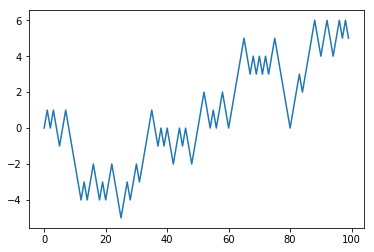

In [327]:
# pure python implementation of 1000 steps
import random
position = 0
walk= [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])
plt.show()

In [342]:
# walk is simply the cumsum of the random steps
# using numpy
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [343]:
# extract statistics
walk.min()

-79

In [344]:
walk.max()

2

A more complicated statistic is the _first crossing time_, the step at which the random walk reaches a particular value.
Here we might want to know how ling it took the random walk to get at least 10 steps away from the origin 0 in either direction.

In [345]:
# gives a boolean array indicating where the walk has reach or exceeded 10
np.abs(walk) >= 10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [346]:
# but we want the index of the first 10 or -10
(np.abs(walk) >= 10).argmax()  # returns 1st index of the max value in the boolean array (True is the max value)

41

### Simulating Many Random Walks at Once
Generating many random walks, say 5,000, can be done with minor modifications to the preceeding code. Pass a 2-tuple, the numpy.random functions will generate a 2-dim array of draws, and we can compute the cumsum across the rows to compute all 5,000 random walks in one shot.

In [357]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))  # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,   0,  -1, ...,  18,  17,  16],
       [ -1,   0,   1, ...,   2,   1,   2],
       [ -1,   0,  -1, ...,   0,  -1,  -2],
       ..., 
       [ -1,  -2,  -3, ..., -16, -17, -16],
       [ -1,   0,  -1, ..., -38, -39, -38],
       [  1,   2,   3, ...,   2,   3,   4]])

In [358]:
walks.max()

122

In [359]:
walks.min()

-109

In [360]:
# out of these walks compute the minimum crossing time to 30 or -30
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ...,  True,  True, False], dtype=bool)

In [361]:
hits30.sum()

3424

In [362]:
# use boolean array to select out the rows of walks that actually cross the
# abs 30 level and call argmax across axis 1 to get the crossing times
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

500.15595794392522